<a href="https://colab.research.google.com/github/Normalita06/Praktikum_DataMining/blob/main/datamining3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PENELITIAN STATISTIK PENGARUH KESEHATAN MENTAL PADA SISWA**

# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**Business Understanding**

##**Business Objective**

Analisis ini bertujuan untuk melihat pola dan korelasi yang dapat menjadi masukan bagi intervensi yang ditargetkan dan sistem dukungan. Selain itu, memahami dan memberikan pemahaman bagaimana usia, status, nilai akademik, dan status depresi saling terkait memberikan perspektiif holistik, menumbuhkan apresiasi yang lebih dalam terhadap tantangan dan keberhasilan yang mungkin dihadapi siswa selama perjalanan pendidikan mereka.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah kurangnya kesadaran pada kesehatan mental yang berimbas minimnya rasa kepedulian serta apresiasi kepada para siswa yang tengah menghadapi tantangan akademik.

##**Data Mining Goals**

Tujuan dari menavigasi kumpulan data ini adalah untuk menyumbangkan wawasan bermakna yang diiharapkan akan meningkatkan pemahaman kita tentang dinamika siswa namun juga meletakkan dasar untuk mengembangkan strategi yang disesuaikan untuk mendukung kesejahteraan siswa dan keberhasilan akademik.

##**Project Plan**

Dengan mengumpulkan data selanjutnya, data-data diidentifikasi dan dieksplorasi untuk mengindentifikasi korelasi dan hubungan antar variabel. Selain itu, data akan dinilai dan masalah data akan diidentifikasi agar dapat diatasi dalam tahapan berikutnya.

#**DATA UNDERSTANDING**


##**Collect Initial Data**

Sumber data yang digunakan diambil dari website Kaggle. Kaggle merupakan platform yang menyediakan berbagai dataset untuk keperluan kompetisi data science, proyek-proyek belajar, dan penelitian. data-data dari website Kaggle biasanya berasal dari berbagai sumber, termasuk institusi akademik, perusahaan, organisasi non-profit, dan individu yang menyumbangkan dataset mereka.

berikut link dataset yang digunakan pada project kali ini : https://www.kaggle.com/datasets/shariful07/student-mental-health

In [2]:
df = pd.read_csv('StudentMentalhealth.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


##**Describe Data**

####Informasi Data

In [3]:
print("Baris :",df.shape[0])
print("Kolom :",df.shape[1])

Baris : 101
Kolom : 11


dari dataset menampilkan jumlah baris dan jumlah kolom, yaitu jumlah baris 101 dan jumlah kolom 11.

####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

diatas menampilkan jumlah kolom dari dataset yang berjumlah 11 dan spesifikasi dari dataset yang ada.

1. Timestamp : kolom yang berisi tanggal dan waktu. jumlah non-null adalah 101 dan tipe datanya object.

2. Choose your gender : kolom yang berisikan data gender. jumlah non-null adalah 101 dan tipe datanya object.

3. Age : kolom yang berisi data umur/usia. jumlah non-null adalah 100 dan tipe datanya float64.

4. What is your course : kolom yang berisikan penjurusan yang diambil. jumlah non-null adalah 101 dan tipe datanya object.

5. Your current year of Study : kolom yang berisikan data berapa lama dalam penjurusan. jumlah 101 non-null dengan tipedata object

6. What is your CGPA? : kolom yang berisikan data rata-rata nilai. jumlah non-null 101, tipedata object

7. Marital status : kolom yang berisikan data status kelajangan. jumlah 101 non-null, tipedata object

8. Do you have Depression? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

9. Do you have Anxiety? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

10. Do you have Panic attack? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

11. Did you seek any specialist for a treatment? : kolom yang berisikan data yes/no dari pertanyaan tersebut. jumlah non-null 101, tipedata object

####Informasi Statistik Deskriptif

In [5]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


nilai rata-rata dari usia adalah 20.53000 dengan standar deviasi sekitar 2.49628. Nilai minimum adalah 18.00000 dan maximum 24.00000

##**Exploratory Data Analysis**

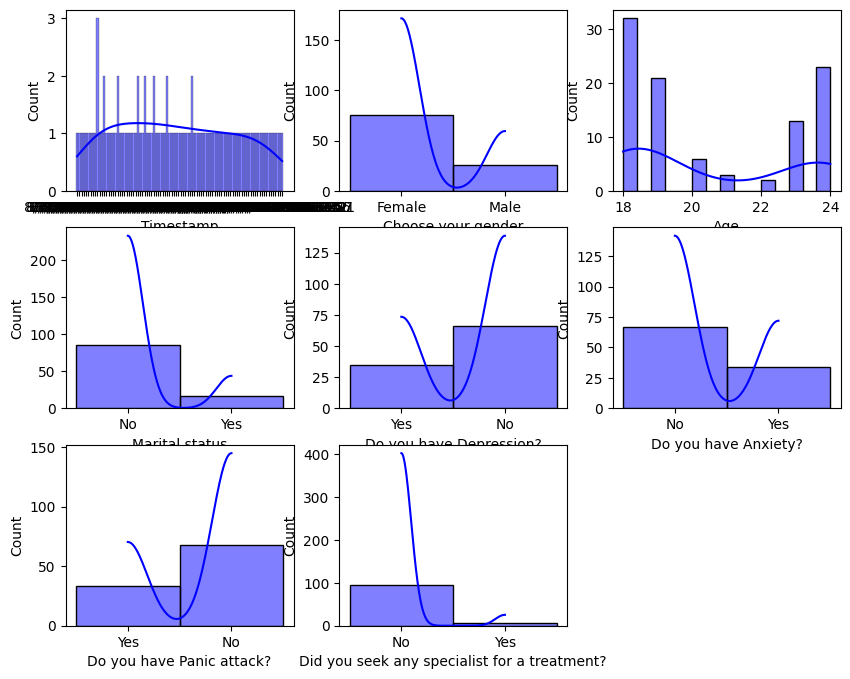

In [6]:
df = pd.read_csv('StudentMentalhealth.csv')

#Define the list of columns to visualize
columns = ['Timestamp', 'Choose your gender', 'Age', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

#Create the plot
plt.figure(figsize=(10, 8))

for i, Quality in enumerate(columns):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data=df, x=Quality, kde=True, bins=15, color='blue')

plt.show()

dari visualisasi diatas dapat membantu dalam memahami karakteristik responden dan memberikan wawasan atau informasi persentase tingkat kondisi kesehatan mental yang dialami dalam rentang usia, gender, status, dan berapa yang mencari bantuan dari spesialis untuk pengobatan.

ini dapat memberikan informasi tentang tingkat kesadaran dan aksesibilitas layanan kesehatan mental di antara mereka.

##**Verify Data Quality**

####Missing Values

In [7]:
data = pd.read_csv('StudentMentalhealth.csv')

#mengecek apakah ada nilai kosong pada tiap kolom
missing_values = data.isnull().sum()

#menampilkan jumlah nilai kosong pada tiap kolom
print(missing_values)

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


tampilan diatas menyatakan bahwa ada 1 nilai kosong yang terdapat pada kolom 'Age'. nilai nol pada kolom lainnya menyatakan tidak ada nilai kosong pada kolom tersebut.

####Outliers Values

In [8]:
#mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
  #convert the column to a numeric data type
  column = pd.to_numeric(column, errors='coerce')

  #remove NaN values
  column = column.dropna()

  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1

  #detect outliers
  outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

  #calculate the percentage of outliers
  percentage_outliers = outliers.sum() / len(column) * 100

  return outliers, percentage_outliers

#loop untuk setiap kolom
for column in df.columns:
  outliers, percentage_outliers = detect_outliers(df[column])

  print(f"Kolom '{column}':")
  print(f" - Jumlah outliers: {outliers.sum()}")
  print(f" - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
  print()

Kolom 'Timestamp':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Choose your gender':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Age':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: 0.00%

Kolom 'What is your course?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Your current year of Study':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'What is your CGPA?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Marital status':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Depression?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Anxiety?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Do you have Panic attack?':
 - Jumlah outliers: 0
 - Persentase kehadiran outliers: nan%

Kolom 'Did you seek any specialist for a treatment?':
 - Jumlah outliers: 0
 - Persentase kehadiran out

<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in scalar divide
  percentage_outliers = outliers.sum() / len(column) * 100
<ipython-input-8-f970efaaa3ae>:17: RuntimeWarning: invalid value encountered in sc

dari hasil diatas dapat dilihat, bahwa menyatakan tidak ada nilai duplikat pada data

####Duplicated Values

In [9]:
duplicates_by_values = df.duplicated().sum()
print(duplicates_by_values)

0


hasil duplikat menyatakan nol (0)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [10]:
print((df.isna().sum() / len(df)) * 100)

Timestamp                                       0.000000
Choose your gender                              0.000000
Age                                             0.990099
What is your course?                            0.000000
Your current year of Study                      0.000000
What is your CGPA?                              0.000000
Marital status                                  0.000000
Do you have Depression?                         0.000000
Do you have Anxiety?                            0.000000
Do you have Panic attack?                       0.000000
Did you seek any specialist for a treatment?    0.000000
dtype: float64


Dari output di atas, dapat dilihat bahwa kolom "Age" adalah satu-satunya kolom yang memiliki nilai yang kosong dengan sekitar 0.99% dari total baris DataFrame.

In [11]:
df[df['Age'].isnull()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No


(NaN) menunjukkan nilai yang kosong.

#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom Age tidak lebih dari 70%, maka kolom tersebut tidak harus dihapus.

#####**Imputasi Missing Values**

Untuk kolom Age, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom Age.

In [12]:
df['Age'].dropna().describe()

count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom Age untuk imputasi nilai kosong tersebut.

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().mean())

Syntax diatas digunakan untuk mengisi nilai yang kosong(NaN) dalam kolom "Age" dengan nilai rata-rata dari nilai yang valid dalam kolom.

df['Age'].dropna(): untuk menghapus semua nilai NaN dari kolom "Age". Hasilnya adalah sebuah Series yang hanya berisi nilai-nilai yang valid.

.mean(): untuk menghitung rata-rata dari nilai-nilai yang valid dalam kolom "Age".

df['Age'].fillna(...): untuk mengisi nilai-nilai NaN dalam kolom "Age" dengan nilai rata-rata yang telah dihitung sebelumnya.

#####**Pengecekkan Ulang**

In [14]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Timestamp,0.0
Choose your gender,0.0
Age,0.0
What is your course?,0.0
Your current year of Study,0.0
What is your CGPA?,0.0
Marital status,0.0
Do you have Depression?,0.0
Do you have Anxiety?,0.0
Do you have Panic attack?,0.0


Setelah kita mengisi nilai yang kosong, kita melakukan pengecekkan ulang dan diatas menampilkan bahwa persentase pada kolom "Age" sudah 0.0 yang artinya sudah tidak ada lagi nilai kosong pada kolom tersebut.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

Pengecekkan nilai duplikat adalah proses untuk memeriksa apakah terdapat baris-baris dalam dataset yang memiliki nilai yang sama di semua kolomnya.

In [15]:
df[df.duplicated()]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?


Karena pengecekkan menunjukkan tidak ada nilai duplikat, maka tidak ada nilai duplikat yang harus dihapus.

#####**Hapus Nilai Duplikat**

tidak ada nilai duplikat yang harus dihapus.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

Pengecekkan outliers adalah proses identifikasi nilai-nilai ekstrem yang berbeda secara signifikan dari sebuah dataset. Pengecekkan outliers penting karena dapat mempengaruhi analisis statistik dan model prediktif.

In [16]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom' : col, 'Persentase Outliers' : percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,0.0


Dalam pengecekkan outliers diatas menunjukkan pada kolom "Age" tidak memiliki persentase outliers. Dengan demikian, kolom "Age" dalam dataset tidak memiliki nilai yang secara signifikan berbeda dari sebagian besar data lainnya, maka tidak ada nilai pada kolom yang perlu di drop atau dihapus.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Proses dimana kita akan membuat fitur-fitur baru dalam dataset untuk meningkatkan kinerja model machine learning.

In [17]:
def categorize_age(age):
  if age < 18:
    return 'Child'
  elif 18 <= age < 60:
    return 'Adult'
  else:
    return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

diatas kita buat fungsi "categorize_age" yang akan mengategorikan usia 'Child' untuk usia di bawah 18 tahun, 'Adult' untuk usia antara 18 dan 59 tahun, dan 'Elderly' untuk usia 60 tahun ke atas.

###**Pengecekkan Hasil**

In [18]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,Adult
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,Adult
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,Adult
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,Adult
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,Adult


Hasilnya akan tertampil seperti diatas, seperti penjelasan sebelumnya perhatikan kolom "Age" dan "AgeCategory".

#**Data Reduction**

####**Mengurangi Fitur-fitur yang kurang relevan**

In [19]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

diatas menampilkan dan menghitung korelasi antar kolom yang bersifat numeric saja. Karena hanya 1 kolom saja pada data kita yang bersifat numeric dan kolom tersebut termasuk relevan maka tidak ada pengurangan dalam dataframe.

#**Data Transformation**

###**Mapping**

Mapping merupakan proses meghubungkan nilai dari satu set data ke nilai set data lainnya, mengubah nilai dari satu format ke format lainnya atau menghubungkan nilai dalam satu dataset dengan nilai dalam dataset lain.

In [20]:
df['Choose your gender'] = df['Choose your gender'].map({'Male':1, 'Female':0})
df['AgeCategory'] = df['AgeCategory'].map({'Child':0, 'Adult':1, 'Elder':2}).astype(int)

pada syntax baris pertama, mengubah nilai dalam kolom 'Choose your gender' dari string 'Male' menjadi 1 dan string 'Female' menjadi 0.

lalu pada baris kedua,  Syntax ini mengubah nilai dalam kolom 'AgeCategory' dari string 'Child' menjadi 0, 'Adult' menjadi 1, dan 'Elder' menjadi 2. Hasil pemetaan ini disimpan kembali ke kolom 'AgeCategory'.

In [21]:
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,AgeCategory
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,1
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,1
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,1
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,0,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No,1
97,13/07/2020 21:21:42,1,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No,1
98,13/07/2020 21:22:56,0,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No,1
99,13/07/2020 21:23:57,0,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No,1


###**Encoding**

Encoding adalah sebuah proses mengonversi data dari satu bentuk ke bentuk lain.

In [22]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [23]:
df.head()

,Choose your gender,Age,AgeCategory,Timestamp_13/07/2020 10:07:32,Timestamp_13/07/2020 10:10:30,Timestamp_13/07/2020 10:11:26,Timestamp_13/07/2020 10:12:18,Timestamp_13/07/2020 10:12:26,Timestamp_13/07/2020 10:12:28,Timestamp_13/07/2020 10:14:46,...,Marital status_No,Marital status_Yes,Do you have Depression?_No,Do you have Depression?_Yes,Do you have Anxiety?_No,Do you have Anxiety?_Yes,Do you have Panic attack?_No,Do you have Panic attack?_Yes,Did you seek any specialist for a treatment?_No,Did you seek any specialist for a treatment?_Yes
0,0,18.0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
1,1,21.0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2,1,19.0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
3,0,22.0,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
4,1,23.0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


 di atas adalah hasil dari proses one-hot encoding yang telah dilakukan pada DataFrame. Setiap kolom dalam output mewakili nilai unik dari kolom kategorikal dalam dataset asli dan nilai-nilai tersebut telah diubah menjadi representasi numerik biner. Misalnya, kolom "Choose your gender" yang awalnya memiliki nilai 'Male' dan 'Female', sekarang terpisah menjadi dua kolom baru yaitu "Choose your gender_0" untuk nilai 'Male' dan "Choose your gender_1" untuk nilai 'Female'. Jika baris tersebut adalah 'Male', kolom "Choose your gender_0" akan bernilai 1 dan "Choose your gender_1" akan bernilai 0, dan sebaliknya jika baris tersebut adalah 'Female'.

bisa dilihat juga bahwa setiap nilai unik dari kolom kategorikal telah diubah menjadi kolom baru dengan representasi numerik biner.